In [13]:
import pandas as pd
import numpy as np

<Figure size 1000x800 with 0 Axes>

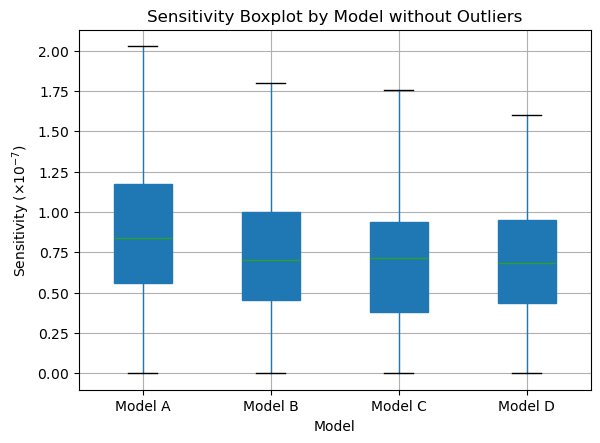

In [14]:
# Corrected code for creating a boxplot with specified colors for each model, without outliers

import matplotlib.pyplot as plt
import pandas as pd

# Load the data from CSV file (assuming it's correctly formatted)
# Load the data from CSV file
sensitivity_results = pd.read_csv('/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/Notebooks/past_values_10_03_new/sensitivity_results_1000_05_2.csv')
# Define function for formatting the y-axis labels to scientific notation
def format_ylabel(ax, label):
    # Use the ticklabel_format to force scientific notation
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.major.formatter._useMathText = True
    plt.draw()
    
    # Get the offset text, which is the scientific notation exponent
    offset_text = ax.yaxis.get_offset_text().get_text()
    if offset_text:
        ax.yaxis.offsetText.set_visible(False)
        label_with_offset = f"{label} ({offset_text})"
    else:
        label_with_offset = label
    
    ax.set_ylabel(label_with_offset, fontsize=10)
    return ax

# Map model names for readability
model_name_mapping = {
    'sdr_kfold_shap_10_aplha03_25_1000_l1': 'Model A',
    'sir_intensity_total_shap_10_aplha03': 'Model B',
    'binary_classifier_sota_10': 'Model C',
    'sdr_average_10_aplha03_1000_l1': 'Model D'
}
sensitivity_results['model'] = sensitivity_results['model'].map(model_name_mapping)


# Create the boxplot and keep references to the artist elements
plt.figure(figsize=(10, 8))
boxplot_artists = sensitivity_results.boxplot(column='sensitivity', by='model', patch_artist=True, showfliers=False, return_type='dict')

ax = plt.gca()
format_ylabel(ax, "Sensitivity")

# Removing pandas automatic 'Grouped by' title and setting our own
plt.suptitle('')
plt.title('Sensitivity Boxplot by Model without Outliers')

# Labeling the axes
plt.xlabel('Model')


# Display the plot
plt.show()


<Figure size 1000x800 with 0 Axes>

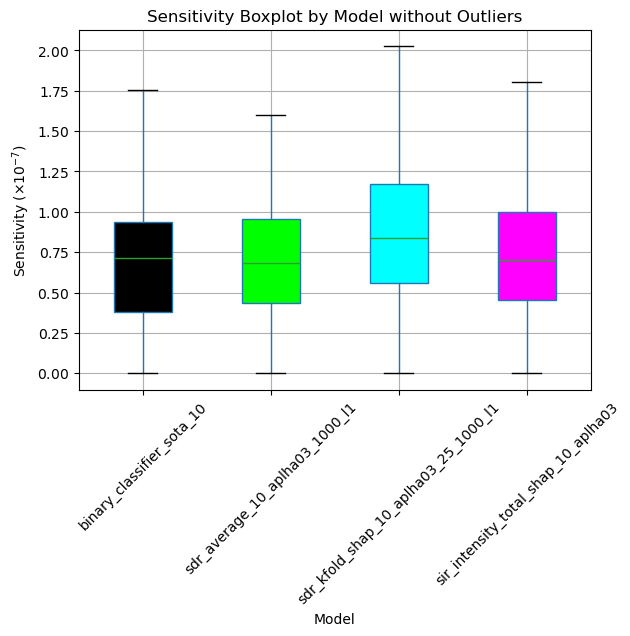

In [15]:
# Since the user requested to use the provided function and the previous code snippet to generate a boxplot, let's integrate them.
# This code will plot a boxplot of sensitivities grouped by model, without outliers, and with a scientific notation on the y-axis.

import matplotlib.pyplot as plt
import pandas as pd


# Load the data from CSV file
sensitivity_results = pd.read_csv('/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/Notebooks/past_values_10_03_new/sensitivity_results_1000_05_2.csv')

color_mapping = {
    'Model A': 'black',
    'Model B': 'lime',
    'Model C': 'cyan',
    'Model D': 'magenta'
}

# Define function for formatting the y-axis labels to scientific notation
def format_ylabel(ax, label):
    # Use the ticklabel_format to force scientific notation
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.major.formatter._useMathText = True
    plt.draw()
    
    # Get the offset text, which is the scientific notation exponent
    offset_text = ax.yaxis.get_offset_text().get_text()
    if offset_text:
        ax.yaxis.offsetText.set_visible(False)
        label_with_offset = f"{label} ({offset_text})"
    else:
        label_with_offset = label
    
    ax.set_ylabel(label_with_offset, fontsize=10)
    return ax

plt.figure(figsize=(10, 8))

# Create the boxplot with patch_artist=True to fill with color
boxplot_dict = sensitivity_results.boxplot(column='sensitivity', by='model', patch_artist=True, showfliers=False, return_type='dict')

# Coloring each box according to the color mapping
for box, color in zip(boxplot_dict['sensitivity']['boxes'], color_mapping.values()):
    box.set_facecolor(color)

ax = plt.gca()
format_ylabel(ax, "Sensitivity")

plt.title('Sensitivity Boxplot by Model without Outliers')
plt.xlabel('Model')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.suptitle('')  # Remove automatic 'Grouped by' title

plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Load the detailed sensitivity data
df_detailed_data = pd.read_csv('/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/Notebooks/past_values_10_03_new/detailed_sensitivity_data_mse.csv')

# Extract unique model names from the DataFrame
unique_models = df_detailed_data['model_type'].unique()

# Initialize dictionaries to store max and median sensitivities
max_sensitivities = {model: [] for model in unique_models}
median_sensitivities = {model: [] for model in unique_models}
perturb_radii = np.linspace(0, 0.05, 10)
# Calculate max and median sensitivities for each model and noise level
for r in perturb_radii:
    for model in unique_models:
        filtered_data = df_detailed_data[(df_detailed_data['model_type'] == model) & (df_detailed_data['perturb_radius'] == r)]
        max_sensitivity = filtered_data['mse_shap'].max()
        median_sensitivity = filtered_data['mse_shap'].median()
        max_sensitivities[model].append(max_sensitivity)
        median_sensitivities[model].append(median_sensitivity)


In [20]:

model_names = {
    'sdr_kfold_shap_10_aplha03_25_1000_l1': 'Model A - SDR K-Fold XAI',
    'sir_intensity_total_shap_10_aplha03': 'Model B - SIR XAI',
    'binary_classifier_sota_10': 'Model C - Baseline Classifier SOTA',
    'sdr_average_10_aplha03_1000_l1': 'Model D - SDR Averaged XAI'
}

color_mapping = {
    'sdr_kfold_shap_10_aplha03_25_1000_l1': 'black',
    'sir_intensity_total_shap_10_aplha03': 'lime',
    'binary_classifier_sota_10': 'cyan',
    'sdr_average_10_aplha03_1000_l1': 'magenta'
}

# Function to get color for a model
def get_model_color(model_name):
    return color_mapping.get(model_name, 'gray')  # Default to 'gray' if model not found



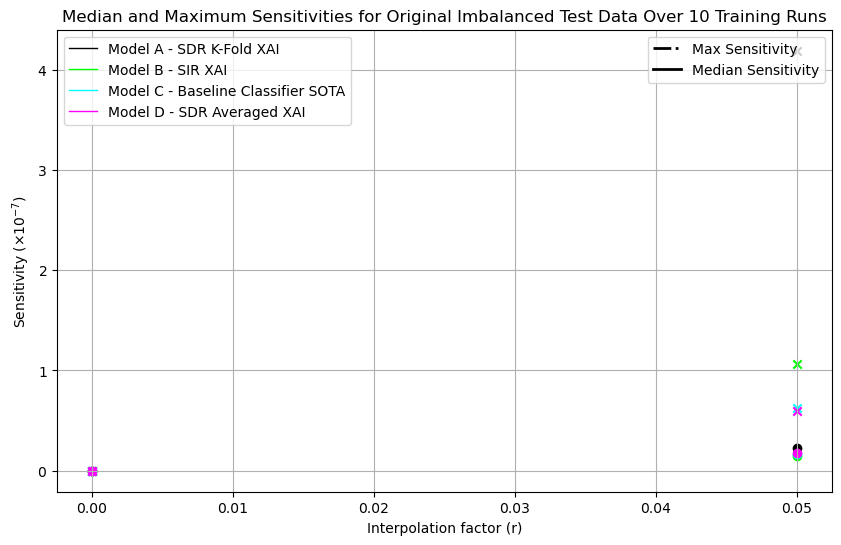

In [21]:
plt.figure(figsize=(10, 6))
ax4 = plt.gca()

# Create lists to store legend elements for models and sensitivities
legend_models = []
legend_sensitivity_types = []

# Define line styles for median and max
line_style_median = '-'
line_style_max = '-.'

# Plotting each model's median and max sensitivities
for model_file_name in unique_models:
    color = get_model_color(model_file_name)
    label_model = model_names.get(model_file_name, model_file_name)
    
    # Retrieve max and median values
    max_values = max_sensitivities[model_file_name]
    median_values = median_sensitivities[model_file_name]

    # Plot maximum values
    plt.plot(perturb_radii, max_values, color=color, linestyle=line_style_max)
    plt.scatter(perturb_radii, max_values, color=color, marker='x')

    # Plot median values
    plt.plot(perturb_radii, median_values, color=color, linestyle=line_style_median)
    plt.scatter(perturb_radii, median_values, color=color, marker='o')

#dd model to the legend
    legend_models.append(plt.Line2D([0], [0], color=color, lw=1, label=label_model))

# Add separate line entries for Median and Max
legend_sensitivity_types.append(plt.Line2D([0], [0], color='black', linestyle=line_style_max, lw=2, label='Max Sensitivity'))
legend_sensitivity_types.append(plt.Line2D([0], [0], color='black', linestyle=line_style_median, lw=2, label='Median Sensitivity'))

format_ylabel(ax4, "Sensitivity")
plt.xlabel("Interpolation factor (r)")

# Add legends
first_legend = plt.legend(handles=legend_models, loc="upper left")
ax4.add_artist(first_legend)  
plt.legend(handles=legend_sensitivity_types, loc="upper right")

plt.grid(True)
plt.title("Median and Maximum Sensitivities for Original Imbalanced Test Data Over 10 Training Runs")
plt.show()
